# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

```python
env.close()
```

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The agent is trained using the deep reinforcement learning algorithm (DQN) presented [here](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf). The implementation below is based on the solution to the excersice at [this link](https://classroom.udacity.com/nanodegrees/nd893/parts/6b0c03a7-6667-4fcf-a9ed-dd41a2f76485/modules/4eeb16ab-5ac5-47bf-974d-12784e9730d7/lessons/a6829f14-5ef0-4b4a-83ed-234029c5cc60/concepts/02a1cc37-a38b-4159-8a4e-4abc4db8cb87).

The DQN algorithm consists of the follwing steps:

- Initialization of the neural network weights and the q values (usually done by a random initialization).
- Initizialization of a reply memory to store experience tuples of the form (S, A, R, S').
- When sufficient tuples are store in memory, training of the learning model can start. A batch of random tuples are taken from memory as inputs and targets are actions maximizing the Q function.
- A target neural network (NN) is used to implement the fixed Q-targets technique. The target neural network can be initialize with the weights of the training neural network.
- At each pass of the training model, the weights are updated. However the target network is not constantly updated. From time to time, the target network will be updated with the most resent weights of the network being trained.

The implementation of the DQN is on files `navigation_dqn_agent.py` and `navigation_model.py`. The latest file contains the network architecture. In the present case a simple network with 2 hidden layers and one output layer was chosen. The NN is as follows:

- First hidden layer: linear with 64 units and relu activation. The input size corresponds to 37, the dimension of the state space. 
- Second hidden layer: linear with 64 units and relu activation.
- Output layer: linear with 4 units corresponding to the 4 possible actions the agent can take. No activation applied.
- Learning rate: 0.0005.
- Batch size: 64.

The parameters of the Q learning part are choosen as follows:

- Variable epsilon from 1 to  0.01 with a decay rate of 0.995.
- Discount factor gamma set at 0.99

As the agent learns, the weights are saved in `./checkpoints`, in order to visualize the agents behavior at each stage of learning. The weights for the solved agent are saved as `./checkpoints/solved_checkpoint.pth`.


In [6]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from navigation_dqn_agent import Agent
%matplotlib inline

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

Episode 100	Average Score: 0.94
Episode 200	Average Score: 4.21
Episode 300	Average Score: 7.43
Episode 400	Average Score: 9.92
Episode 500	Average Score: 12.87
Episode 503	Average Score: 13.05
Environment solved in 403 episodes!	Average Score: 13.05


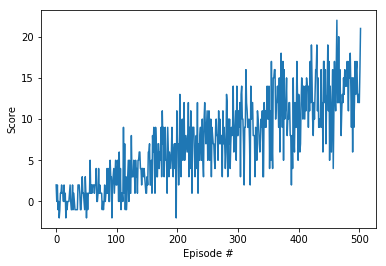

In [7]:
def dqn(n_episodes=2000, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
In [ ]:

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), './checkpoints/checkpoint'+str(i_episode)+'.pth')
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), './checkpoints/solved_checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

The plot above shows how the agent learns over time until it reaches an average score over 100 episodes greater than 13. The score target, when it is admitted that the agent solves the environment, is reached in 403 episodes.

Let's visualize the agents behavior as it is being trained. This is achieved by loading the saved weights, as the agent was trained, into the model.

In [12]:
import os

dir_name = './checkpoints'                             # folder where checkpoints were saved
files = [f for f in os.listdir(dir_name)]              # list of checkpoints
files.sort()                                           # time steps to display

for file in files:
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load(dir_name+'/'+file))

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        
        if done:                                       # exit loop if episode finished
            break

    print("Score for "+file+": {}".format(score))

Score for checkpoint100.pth: 3.0
Score for checkpoint200.pth: 2.0
Score for checkpoint300.pth: 2.0
Score for checkpoint400.pth: 15.0
Score for checkpoint500.pth: 17.0
Score for solved_checkpoint.pth: 20.0


Let's visualize the solved agent.

In [14]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('./checkpoints/solved_checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 17.0


In [15]:
env.close()

#### Possible improvements:

To further improve the agent, instead of using the 37 dimensions reduced state vector as input, it would be possible to use complete images of the environment. This will allow the agent to learn from the entire area he can perceive instead of learning from a reduced representation of what he percieves. This will also allow the use of CNNs.

Another option is to use a double DQN instead of a simple DQN. Simple DQN tends to overstimate Q values, so one alternative is to estimate the best action with a given set of weights and evaluate that action with a different set of weights. The different set of weights can be the ones contained on the target network. This double DQN has been shown to perform better than simple DQNs (see [here](https://arxiv.org/pdf/1509.06461.pdf)).

A third option is to implement prioritized experience replay. In this technique, we admit that some experience tuples (S, A, R, S') are more important for learning than others. So the key here, is to identify the more meaningful tuples for learning contained in the replay memory. It just needs to be kept in mind that the agent needs to learn from all the experinces even if some are more important than others.

A fourth option, is to use dueling networks. The idea here is to asses the value of a state without having to learn the effect of each action in that state. This is accomplished by using two streams in a NN, one estimating the state value function and the other estimating the advantage for each action. Then the desired Q value is obtained by combining the obtained state value function and the advantage value.

Finally, an algorithm combining the appraoches just exposed can be implemented to further improve the agent.